**Pre**

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.contrib.timeseries.python.timeseries.estimators import TimeSeriesRegressor

In [23]:
df1 = pd.read_csv('Hackathon_Confidentiel_d2-25.csv',sep=';')
vol2 = df1[df1['Vol'] == 2]

In [51]:
vol2.shape

(7260, 92)

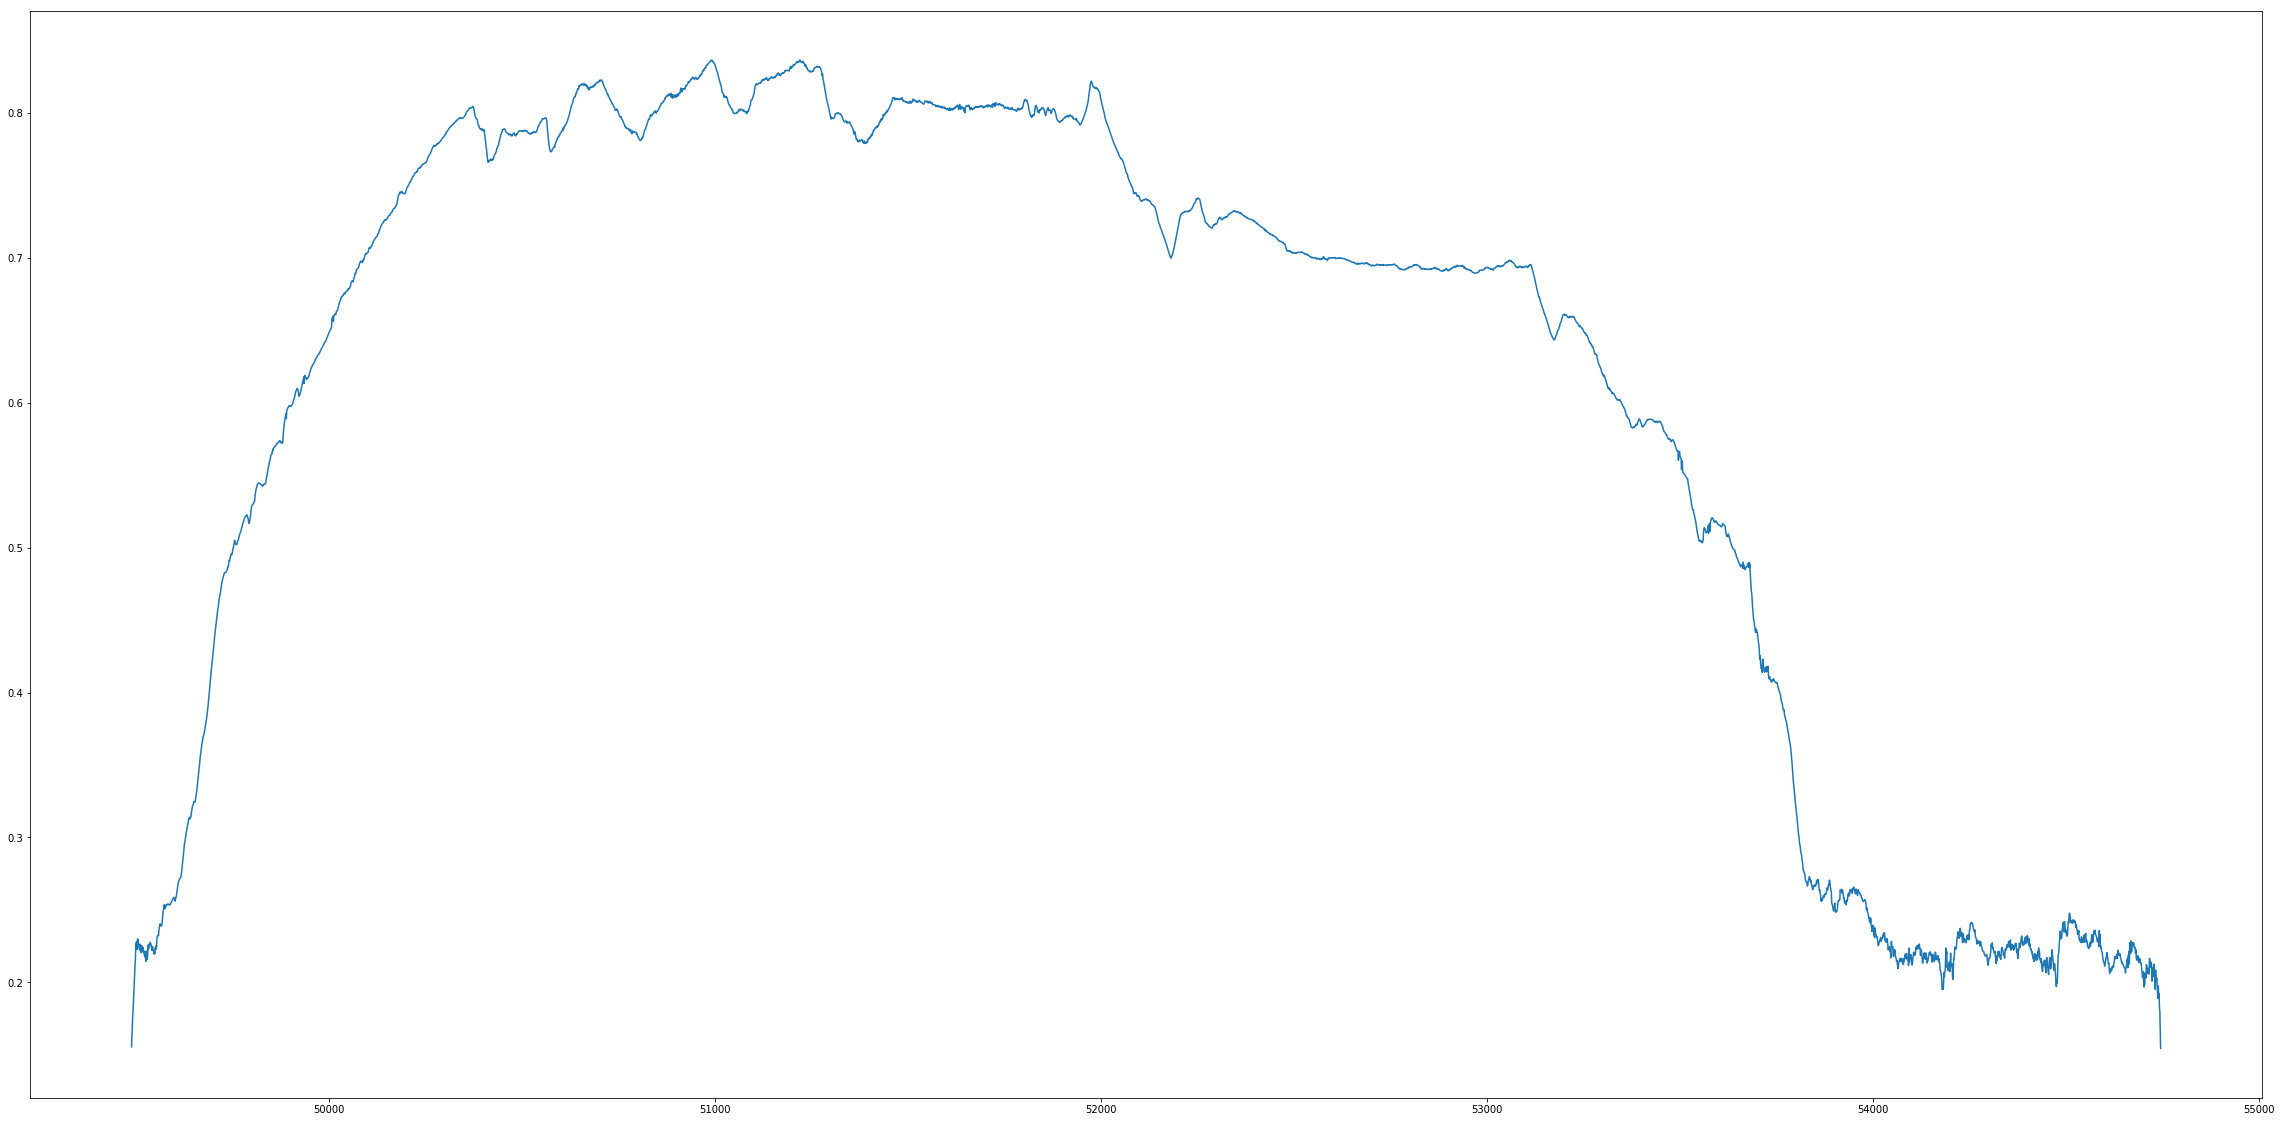

In [42]:
flying = vol2[vol2['MACH'] > 0.15]
plt.figure(figsize=(40,20))
plt.plot(flying.time, flying.MACH)
plt.show()

In [49]:
flying = flying.reset_index(drop = True)

In [53]:
flying.columns

Index(['time', 'FQTOT_', 'MACH', 'MASSE_', 'QCOND_', 'QHOTCAB', 'QHOTCREW',
       'SAT_', 'T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'TAT_', 'T08',
       'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'TBLDC', 'TBLDL',
       'TBLDR', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24',
       'T25', 'T26', 'T27', 'T28', 'T29', 'T30', 'T31', 'T32', 'T33', 'T34',
       'T35', 'T36', 'T37', 'T38', 'T39', 'T40', 'T41', 'T42', 'T43', 'T44',
       'T45', 'T46', 'T47', 'T48', 'T49', 'T50', 'T51', 'T52', 'T53', 'T54',
       'T55', 'T56', 'T57', 'T58', 'T59', 'T60', 'T61', 'T62', 'T63', 'T64',
       'T65', 'T66', 'VC', 'XE1', 'XE2', 'XE3', 'XE4', 'XE5', 'XE6', 'XNAI',
       'XWAI', 'XWOWGRND', 'ZP', 'Vol', 'Puissance soleil Crew',
       'Puissance soleil Pax'],
      dtype='object')

In [70]:
T_cabine = ['time','T18','T19','T20','T21']



vector = flying[T_cabine]
#vector = flying[['time','T18','T19','T20','T21','FQTOT_','MASSE_','QHOTCAB','SAT_','VC','ZP','Puissance soleil Pax']]

In [82]:
vector.head()

,time,T18,T19,T20,T21
0,49489,22.5579,22.4062,9.90828,23.6322
1,49490,22.5322,22.4062,9.91063,23.6562
2,49491,22.5385,22.4110,9.93243,23.6493
3,49492,22.5385,22.3125,9.97112,23.6250
4,49493,22.5101,22.3438,9.96911,23.6390


In [75]:
vector.to_csv('./data/LSTM.csv')

**LSTM**

In [80]:
import tensorflow as tf

In [83]:
path = ''
csv_file_name = path.join("./data/LSTM.csv")
reader = tf.contrib.timeseries.CSVReader(
   csv_file_name,
   column_names=((tf.contrib.timeseries.TrainEvalFeatures.TIMES,)
                 + (tf.contrib.timeseries.TrainEvalFeatures.VALUES,) * 4))
train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(
   reader, batch_size=4, window_size=32)

In [84]:
estimator = ts_estimators.TimeSeriesRegressor(
   model=_LSTMModel(num_features=5, num_units=128),
   optimizer=tf.train.AdamOptimizer(0.001))

NameError: name 'ts_estimators' is not defined